In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import math



import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("features_30_sec.csv")

In [3]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
df.shape

(1000, 60)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [7]:
print(df.columns.tolist())

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [8]:
if 'class_name' in df.columns:
    print("Yes")
else:
    print("No")

No


In [ ]:
df["label"].value_counts()

In [9]:
len(df["filename"].unique())

1000

In [ ]:
##Data processing

In [ ]:
### numerical and categorical features

In [10]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [11]:
cat_col,num_col=extract_cat_num(df)

In [12]:
cat_col

['filename', 'label']

In [13]:
num_col

['length',
 'chroma_stft_mean',
 'chroma_stft_var',
 'rms_mean',
 'rms_var',
 'spectral_centroid_mean',
 'spectral_centroid_var',
 'spectral_bandwidth_mean',
 'spectral_bandwidth_var',
 'rolloff_mean',
 'rolloff_var',
 'zero_crossing_rate_mean',
 'zero_crossing_rate_var',
 'harmony_mean',
 'harmony_var',
 'perceptr_mean',
 'perceptr_var',
 'tempo',
 'mfcc1_mean',
 'mfcc1_var',
 'mfcc2_mean',
 'mfcc2_var',
 'mfcc3_mean',
 'mfcc3_var',
 'mfcc4_mean',
 'mfcc4_var',
 'mfcc5_mean',
 'mfcc5_var',
 'mfcc6_mean',
 'mfcc6_var',
 'mfcc7_mean',
 'mfcc7_var',
 'mfcc8_mean',
 'mfcc8_var',
 'mfcc9_mean',
 'mfcc9_var',
 'mfcc10_mean',
 'mfcc10_var',
 'mfcc11_mean',
 'mfcc11_var',
 'mfcc12_mean',
 'mfcc12_var',
 'mfcc13_mean',
 'mfcc13_var',
 'mfcc14_mean',
 'mfcc14_var',
 'mfcc15_mean',
 'mfcc15_var',
 'mfcc16_mean',
 'mfcc16_var',
 'mfcc17_mean',
 'mfcc17_var',
 'mfcc18_mean',
 'mfcc18_var',
 'mfcc19_mean',
 'mfcc19_var',
 'mfcc20_mean',
 'mfcc20_var']

In [14]:
df.shape

(1000, 60)

In [ ]:
## Correlation

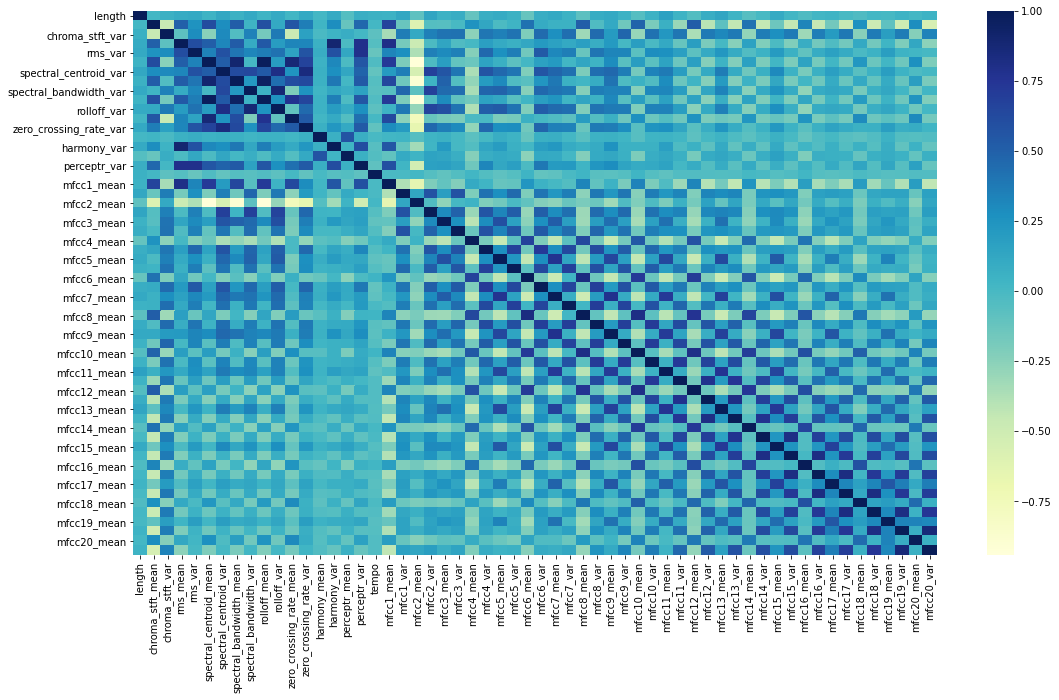

In [15]:
num_col= df.select_dtypes(include=np.number)

corr =  num_col.corr()
plt.figure(figsize=(18,10))

corr =num_col.corr(method='pearson')
sns.heatmap(corr,cmap='YlGnBu')
plt.show()

In [ ]:
## dealing with categorical features

In [16]:
len(df['label'].unique())

10

In [17]:
len(df["filename"].unique())

1000

In [ ]:
#df.filename.value_counts().to_dict()

In [18]:
df["filename"].value_counts()

country.00072.wav      1
jazz.00067.wav         1
jazz.00056.wav         1
blues.00055.wav        1
pop.00012.wav          1
                      ..
classical.00004.wav    1
reggae.00050.wav       1
metal.00059.wav        1
metal.00072.wav        1
blues.00095.wav        1
Name: filename, Length: 1000, dtype: int64

In [19]:
df.shape

(1000, 60)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [22]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,0
1,1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,0
2,2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,0
3,3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,0
4,4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,0


In [ ]:
## splitting data

In [23]:
x=df.drop(['label'],axis=1)

In [24]:
y=df['label']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.75)

In [26]:
print(X_train.shape)
print(X_test.shape)

(750, 59)
(250, 59)


In [ ]:
## standardization

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
##importing libraries of logistic knn,randon forest,decision tree

In [28]:

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:

models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [30]:


for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print("accuracy score = ",accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[19  0  1  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  2 20  3  1  0  0  0  0  0]
 [ 1  0  2 18  2  0  0  0  0  0]
 [ 1  0  1  3 16  0  2  0  0  0]
 [ 0  1  0  0  0 24  0  0  0  0]
 [ 0  0  0  0  2  0 24  0  0  1]
 [ 0  0  0  1  1  1  0 23  1  0]
 [ 0  0  0  0  1  1  0  1 19  1]
 [ 0  0  0  0  1  0  0  2  3 24]]
accuracy score =  0.852


Naive Bayes
[[21  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 20  4  0  0  0  0  0  0]
 [ 0  2  4 16  1  0  0  0  0  0]
 [ 0  0  0  5 20  6  0  0  0  0]
 [ 0  0  0  0  0 20  1  1  0  0]
 [ 0  0  0  0  3  0 24  0  0  0]
 [ 0  0  0  0  0  0  0 22  3  0]
 [ 0  0  0  0  0  0  1  3 16  2]
 [ 0  0  0  0  0  0  0  0  4 24]]
accuracy score =  0.84


RandomForest
[[20  0  0  0  0  1  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  1  0  0  0  0  0]
 [ 0  1  0 24  1  0  0  0  0  0]
 [ 1  0  0  1 17  1  0  0  1  0]
 [ 0  0  0  0  0 24  0  0  0  0]
 [ 0  0  0  0  2  0 25  0  1  0]
 [ 0  0  0  